### HARINASANDRATRA Lahatra Fitiavana




# Project: Wrangling and Analyze Data

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [ ]:
# no code here since the data aka the file is directly downloaded

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
import pandas as pd
import requests

url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response=requests.get(url)

with open("image-predictions.tsv", mode='wb') as file : 
    file.write(response.content) 


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

<i> This is not actually my code. I faced several issues (I have already read helps on the documentation ) when creating my twitter account as a developer so I used the reference code given by Udacity. 
</i>

In [ ]:
# This code is taken from https://video.udacity-data.com/topher/2018/November/5be5fb4c_twitter-api/twitter-api.py
# It is rather a Udacity code
# This code is a demonstration of how we can use tweepy but the tweet_json.txt was directly provided by Udacity 
# The code will take a long time to run and may have issues so the file tweet_json.txt used for the next sections 
# is not the result of this code that  is why I named the result file for this code as tweet_json_.txt


import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pandas as pd

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
df_1=pd.read_csv('twitter-archive-enhanced.csv')

tweet_ids = df_1.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()

with open('tweet_json_.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

## Assessing Data

In [4]:
# useful packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# ignore warning
warnings.filterwarnings('ignore')

# to plot the graphs in the notebook itself
%matplotlib inline

In [5]:
archive_enhanced=pd.read_csv('twitter-archive-enhanced.csv')
image_prediction=pd.read_csv('image-predictions.tsv',sep="\t")
tweet_json=pd.read_json('tweet_json.txt',lines=True)

### Visual Assessment

#### enhanced twitter archive

In [6]:
archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### tweet json

In [7]:
tweet_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


#### image prediction from neural network

In [8]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Programmatic assessment

#### enhanced twitter archive

In [9]:
archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
archive_enhanced.duplicated().sum()

0

In [11]:
archive_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
archive_enhanced.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None
2176,669203728096960512,NaN,NaN,2015-11-24 17:19:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Samsom. He is sexually confused. Reall...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669203728...,9,10,Samsom,None,None,None,None
181,857029823797047296,NaN,NaN,2017-04-26 00:33:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeke. He performs group cheeky wink tu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857029823...,12,10,Zeke,None,None,None,None
2028,671866342182637568,NaN,NaN,2015-12-02 01:39:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dylan. He can use a fork but clearly can'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671866342...,10,10,Dylan,None,None,None,None
2119,670417414769758208,NaN,NaN,2015-11-28 01:42:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sharp dog here. Introverted. Loves purple. Not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670417414...,6,10,None,None,None,None,None
2130,670093938074779648,NaN,NaN,2015-11-27 04:16:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wally. He's a Flaccid Mitochondria. Go...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670093938...,9,10,Wally,None,None,None,None
1130,729113531270991872,NaN,NaN,2016-05-08 00:59:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Challenge accepted""\n10/10 https://t.co/vNjvr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/729113531...,10,10,None,None,None,None,None
1394,700002074055016451,NaN,NaN,2016-02-17 17:01:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Thumas. He covered himself in nanners ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700002074...,9,10,Thumas,None,None,None,None
1249,711306686208872448,NaN,NaN,2016-03-19 21:41:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What hooligan sent in pictures w/out a dog in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711306686...,3,10,None,None,None,None,None
2008,672256522047614977,NaN,NaN,2015-12-03 03:30:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Mighty rare dogs here. Long smooth necks. Grea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672256522...,8,10,None,None,None,None,None


#####  some names are unidentified

In [14]:
archive_enhanced.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

##### mistakes on ratings

In [15]:
archive_enhanced[archive_enhanced.rating_denominator==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [16]:
archive_enhanced[archive_enhanced['rating_denominator']>10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [17]:
archive_enhanced[archive_enhanced['rating_denominator']>10].index

Int64Index([ 342,  433,  784,  902, 1068, 1120, 1165, 1202, 1228, 1254, 1274,
            1351, 1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843],
           dtype='int64')

#### check if some dogs belong to more than one category

In [18]:
categories=pd.DataFrame()
categories=pd.concat([archive_enhanced['floofer']!='None',archive_enhanced['pupper']!='None',archive_enhanced['puppo']!='None',archive_enhanced['doggo']!='None'],axis=1)

In [19]:
categories['number']=categories.sum(axis=1)

In [20]:
categories

,floofer,pupper,puppo,doggo,number
0,False,False,False,False,0
1,False,False,False,False,0
2,False,False,False,False,0
3,False,False,False,False,0
4,False,False,False,False,0
...,...,...,...,...,...
2351,False,False,False,False,0
2352,False,False,False,False,0
2353,False,False,False,False,0
2354,False,False,False,False,0


In [21]:
# dogs that belong to more than one category

categories[categories['number']>1].index

Int64Index([191, 200, 460, 531, 565, 575, 705, 733, 778, 822, 889, 956, 1063,
            1113],
           dtype='int64')

#### tweet json

In [22]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [23]:
tweet_json.isna().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

In [24]:
tweet_json.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [25]:
tweet_json.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
863,2016-08-07 15:56:28+00:00,762316489655476224,762316489655476224,This is Scout. He specializes in mid-air freez...,False,"[0, 61]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 762316483720511488, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,5350,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
39,2017-07-11 00:00:02+00:00,884562892145688576,884562892145688576,This is Kevin. He's just so happy. 13/10 what ...,False,"[0, 66]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 884562886777065473, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,24765,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1245,2016-03-20 20:36:28+00:00,711652651650457602,711652651650457600,This is Gary. He just wanted to say hi. 9/10 v...,False,"[0, 88]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 711652646256517120, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4228,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1601,2016-01-09 21:58:42+00:00,685943807276412928,685943807276412928,This is the newly formed pupper a capella grou...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 685943751555051520, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1801,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2076,2015-11-29 05:11:35+00:00,670832455012716544,670832455012716544,This is Amy. She is Queen Starburst. 10/10 une...,False,"[0, 86]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 670832450482769920, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,780,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
976,2016-07-04 16:00:22+00:00,749996283729883136,749996283729883136,This is Bo. He emanates happiness. 12/10 I cou...,False,"[0, 77]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 749823820396163072, 'id_str'...","<a href=""https://about.twitter.com/products/tw...",NaN,...,3331,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
221,2017-04-05 17:00:34+00:00,849668094696017920,849668094696017920,RT @dog_rates: This is Gidget. She's a spy pup...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Sun Feb 19 01:23:00 +0000 2017...,NaN,NaN,NaN
2264,2015-11-20 02:32:25+00:00,667530908589760512,667530908589760512,Meet Naphaniel. He doesn't necessarily enjoy h...,False,"[0, 113]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667530907624968192, 'id_str'...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,501,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
246,2017-03-25 02:15:26+00:00,845459076796616705,845459076796616704,RT @dog_rates: Here's a heartwarming scene of ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Fri Jul 22 00:43:32 +0000 2016...,NaN,NaN,NaN
1744,2015-12-22 02:52:45+00:00,679132435750195208,679132435750195200,This is Louis. He's a river dancer. His friend...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 679132430461239296, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3253,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


#### image prediction data

In [26]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
image_prediction.duplicated().sum()

0

In [28]:
image_prediction.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [29]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1009,709225125749587968,https://pbs.twimg.com/media/Cdese-zWEAArIqE.jpg,1,Labrador_retriever,0.271109,True,Pomeranian,0.150487,True,golden_retriever,0.145578,True
1897,850380195714523136,https://pbs.twimg.com/ext_tw_video_thumb/85038...,1,Yorkshire_terrier,0.249012,True,Maltese_dog,0.166364,True,Shih-Tzu,0.142254,True
844,695074328191332352,https://pbs.twimg.com/media/CaVmajOWYAA1uNG.jpg,1,Shih-Tzu,0.510106,True,Tibetan_terrier,0.071981,True,Lhasa,0.069231,True
500,675845657354215424,https://pbs.twimg.com/media/CWEWClfW4AAnqhG.jpg,1,pug,0.883952,True,Boston_bull,0.011057,True,French_bulldog,0.009840,True
1735,821765923262631936,https://pbs.twimg.com/media/C2d_vnHWEAE9phX.jpg,1,golden_retriever,0.980071,True,Labrador_retriever,0.008758,True,Saluki,0.001806,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
35,666437273139982337,https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg,1,Chihuahua,0.671853,True,beagle,0.124680,True,Saluki,0.044094,True
1564,793614319594401792,https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg,1,golden_retriever,0.705092,True,Labrador_retriever,0.219721,True,kuvasz,0.015965,True
1922,856543823941562368,https://pbs.twimg.com/media/C-MOEDCXYAEjp7o.jpg,1,Boston_bull,0.306910,True,Siamese_cat,0.191218,False,Chihuahua,0.189288,True
908,700505138482569216,https://pbs.twimg.com/media/Cbixs3vUUAAqHHN.jpg,1,bath_towel,0.449684,False,Norwegian_elkhound,0.160205,True,Great_Dane,0.048666,True


##### dataset contains things that are not dog

In [31]:
image_prediction[image_prediction['p1_dog']==False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


### Quality issues

1. `twitter archive enhanced` some irrelevant values in column name ( like **incredibly**, **a**, **O** )

2. `twitter archive enhanced` irrelevant datatypes **retweeted_status_timestamp** **timestamp** should be datetime

3. `twitter archive enhanced` mistakes on dog ratings for observations on indices 313, 342,  433,  902, 1068, 1120, 1165, 1202, 1228, 1254, 1274, 1351, 1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843

4. `twitter_archive_enhanced` the dogs corresponding to these indices 191, 200, 460, 531, 565, 575, 705, 733, 889, 956, 1063, 1113 appear in more than one category

5. `tweet_json` ambiguous column name **id_str**. 

6. `tweet_json` erroneous datatype for **lang** , should be categorical

7.  `tweet_json`  **possibly_sensitive**, **possibly_sensitive_appealable** should be boolean instead of float

8. `image prediction` contains image of other things than dog

### Tidiness issues

1. `twitter archive enhanced` rating should be one single variabe

2. `2 datasets` are enough, `tweet_json`, `twitter_archive_enhanced` can be merged since they are about the same observation

## Cleaning Data

In [32]:
# Make copies of original pieces of data


archive_enhanced_copy=archive_enhanced.copy()
tweet_json_copy=tweet_json.copy()
image_prediction_copy=image_prediction.copy()

### We only want to work with original tweets and not retweets

In [33]:
archive_enhanced= archive_enhanced[archive_enhanced['retweeted_status_id'].isnull()]

## Quality Issues

### Issue #1:` twitter archive enhanced` some irrelevant values in column name ( like incredibly, a, O )

#### Define:
Check the index of the unidentified names and replace the names with `NaN`

#### Code

In [34]:
indices=archive_enhanced.query('name=="a"').index
archive_enhanced.loc[indices,'name']=np.nan

In [35]:
indices=archive_enhanced.query('name=="O"').index
archive_enhanced.loc[indices,'name']=np.nan

#### Test

In [36]:
archive_enhanced.query('name=="a"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [37]:
archive_enhanced.query('name=="O"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2: `twitter archive enhanced` irrelevant datatypes retweeted_status_timestamp timestamp should be datetime

#### Define
Use python's built-in functions and methods to change datatypes

#### Code

In [38]:

archive_enhanced['retweeted_status_timestamp']=pd.to_datetime(archive_enhanced['retweeted_status_timestamp'])

#### Test

In [39]:
archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2175 non-null   object        
 4   source                      2175 non-null   object        
 5   text                        2175 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]
 9   expanded_urls               2117 non-null   object        
 10  rating_numerator            2175 non-null   int64         
 11  rating_denominator          2175 non-null   int64       

### Issue #3:`twitter archive enhanced` mistakes on dog ratings for observations on indices 313, 342,  433,  902, 1068, 1120, 1165, 1202, 1228, 1254, 1274, 1351, 1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843

#### Define

Check on the text the actual rating attributed to these dogs and reassign them manually if it doesn't actually correspond to the text.

#### Code

In [40]:
indices=[313, 342,  433,  902, 1068, 1120, 1165, 1202, 1228, 1254, 1274, 1351, 1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843]

for i in indices:
    print(i,archive_enhanced.loc[i,'text'])

313 @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
342 @docmisterio account started on 11/15/15
433 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
902 Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1120 Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165 Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1228 Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1254 Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.

In [41]:
archive_enhanced.loc[313,'rating_numerator']=13
archive_enhanced.loc[313,'rating_denominator']=10

archive_enhanced.loc[342,'rating_numerator']=np.nan
archive_enhanced.loc[342,'rating_denominator']=np.nan

archive_enhanced.loc[1165,'rating_numerator']=13
archive_enhanced.loc[1165,'rating_denominator']=10

archive_enhanced.loc[1202,'rating_numerator']=11
archive_enhanced.loc[1202,'rating_denominator']=10

archive_enhanced.loc[1662,'rating_numerator']=10
archive_enhanced.loc[1662,'rating_denominator']=10

#### Test

In [42]:
archive_enhanced.iloc[indices,:]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
372,828381636999917570,NaN,NaN,2017-02-05 23:15:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Doobert. He's a deaf doggo. Didn't stop h...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/828381636...,14.0,10.0,Doobert,doggo,None,None,None
405,823939628516474880,NaN,NaN,2017-01-24 17:04:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cash. He's officially given pup on tod...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/823939628...,12.0,10.0,Cash,None,None,None,None
520,810254108431155201,NaN,NaN,2016-12-17 22:43:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Gus. He likes to be close to you, whic...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/810254108...,12.0,10.0,Gus,None,None,None,None
1080,738891149612572673,7.384119e+17,3.589728e+08,2016-06-04 00:32:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@mount_alex3 13/10,NaN,NaN,NaT,NaN,13.0,10.0,None,None,None,None,None
1247,711652651650457602,NaN,NaN,2016-03-20 20:36:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He just wanted to say hi. 9/10 v...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/711652651...,9.0,10.0,Gary,None,None,None,None
1299,707738799544082433,NaN,NaN,2016-03-10 01:24:13 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",He's doing his best. 12/10 very impressive tha...,NaN,NaN,NaT,https://vine.co/v/hUvHKYrdb1d,12.0,10.0,None,None,None,None,None
1344,704499785726889984,NaN,NaN,2016-03-01 02:53:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you wake up from a long nap and have no i...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/704499785...,12.0,10.0,None,None,None,None,None
1381,700890391244103680,NaN,NaN,2016-02-20 03:51:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chet. He's dapper af. His owners want ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/700890391...,11.0,10.0,Chet,None,None,None,None
1407,699079609774645248,NaN,NaN,2016-02-15 03:55:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Reagan. He's a Persnicketus Derpson. Grea...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/699079609...,8.0,10.0,Reagan,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/697463031...,44.0,40.0,None,None,None,None,None


### Issue #4:`twitter_archive_enhanced` the dogs corresponding to these indices 191, 200, 460, 531, 565, 575, 705, 733, 889, 956, 1063, 1113 appear in more than one category

#### Define

Check on the text the actual category attributed to these dogs and reassign them manually if it doesn't actually correspond to the text.

In [43]:
indices=[191, 200, 460, 531, 565, 575, 705, 733, 889, 956, 1063, 1113]

for i in indices:
    print(i,archive_enhanced.loc[i,'text'])

191 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
200 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
460 This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
531 Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
565 Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze
575 This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
705 This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 wou

#### Code

In [44]:
archive_enhanced.loc[191,'floofer']='None'
archive_enhanced.loc[191,'pupper']='None'
archive_enhanced.loc[191,'puppo']='puppo'
archive_enhanced.loc[191,'doggo']='None'

archive_enhanced.loc[200,'floofer']='floofer'
archive_enhanced.loc[200,'pupper']='None'
archive_enhanced.loc[200,'puppo']='None'
archive_enhanced.loc[200,'doggo']='None'

archive_enhanced.loc[460,'floofer']='None'
archive_enhanced.loc[460,'pupper']='None'
archive_enhanced.loc[460,'puppo']='None'
archive_enhanced.loc[460,'doggo']='doggo'

archive_enhanced.loc[531,'floofer']='None'
archive_enhanced.loc[531,'pupper']='None'
archive_enhanced.loc[531,'puppo']='None'
archive_enhanced.loc[531,'doggo']='None'

archive_enhanced.loc[565,'floofer']='None'
archive_enhanced.loc[565,'pupper']='None'
archive_enhanced.loc[565,'puppo']='None'
archive_enhanced.loc[565,'doggo']='None'

archive_enhanced.loc[575,'floofer']='None'
archive_enhanced.loc[575,'pupper']='pupper'
archive_enhanced.loc[575,'puppo']='None'
archive_enhanced.loc[575,'doggo']='None'

archive_enhanced.loc[705,'floofer']='None'
archive_enhanced.loc[705,'pupper']='None'
archive_enhanced.loc[705,'puppo']='None'
archive_enhanced.loc[705,'doggo']='doggo'

archive_enhanced.loc[733,'floofer']='None'
archive_enhanced.loc[733,'pupper']='pupper'
archive_enhanced.loc[733,'puppo']='None'
archive_enhanced.loc[733,'doggo']='None'

archive_enhanced.loc[822,'floofer']='None'
archive_enhanced.loc[822,'pupper']='None'
archive_enhanced.loc[822,'puppo']='None'
archive_enhanced.loc[822,'doggo']='None'

archive_enhanced.loc[889,'floofer']='None'
archive_enhanced.loc[889,'pupper']='None'
archive_enhanced.loc[889,'puppo']='None'
archive_enhanced.loc[889,'doggo']='None'

archive_enhanced.loc[956,'floofer']='None'
archive_enhanced.loc[956,'pupper']='None'
archive_enhanced.loc[956,'puppo']='None'
archive_enhanced.loc[956,'doggo']='None'

archive_enhanced.loc[1063,'floofer']='None'
archive_enhanced.loc[1063,'pupper']='None'
archive_enhanced.loc[1063,'puppo']='None'
archive_enhanced.loc[1063,'doggo']='None'

archive_enhanced.loc[1113,'floofer']='None'
archive_enhanced.loc[1113,'pupper']='None'
archive_enhanced.loc[1113,'puppo']='None'
archive_enhanced.loc[1113,'doggo']='None'

#### Test

In [45]:
categories=pd.DataFrame()
categories=pd.concat([archive_enhanced['floofer']!='None',archive_enhanced['pupper']!='None',archive_enhanced['puppo']!='None',archive_enhanced['doggo']!='None'],axis=1)
categories['number']=categories.sum(axis=1)
categories[categories['number']>1]

,floofer,pupper,puppo,doggo,number


### Issue #5: `tweet_json` ambiguous column name **id_str**

#### Define
Rename the column to **tweet_id** using pandas method

#### Code

In [46]:
tweet_json=tweet_json.rename(columns={'id_str':'tweet_id'})

#### Test

In [47]:
tweet_json.columns

Index(['created_at', 'id', 'tweet_id', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

### Issue #6:`tweet_json` erroneous datatype for **lang** , should be categorical

#### Define
Change datatype to categorical using pandas dataframe method

#### Code

In [48]:
tweet_json['lang']=tweet_json['lang'].astype({'lang':'category'})

#### Test

In [49]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   tweet_id                       2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Issue #7: `tweet_json`  **possibly_sensitive**, **possibly_sensitive_appealable** should be boolean instead of float

#### Define
Use python's built-in methods to change the datatype

#### Code

In [50]:
tweet_json['possibly_sensitive']=tweet_json['possibly_sensitive'].astype(bool)
tweet_json['possibly_sensitive_appealable']=tweet_json['possibly_sensitive_appealable'].astype(bool)

#### Test

In [51]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   tweet_id                       2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Issue #6: `image prediction` contains image of other things than dog

#### Define

Replace False (which means not likely a dog) to NaN and then drop the NaN

#### Code

In [52]:
image_prediction['p1_dog']=image_prediction['p1_dog'].replace(False,np.nan,inplace=True)
image_prediction['p2_dog']=image_prediction['p2_dog'].replace(False,np.nan,inplace=True)
image_prediction['p3_dog']=image_prediction['p3_dog'].replace(False,np.nan,inplace=True)

image_prediction.dropna(inplace=True)

#### Test

In [53]:
image_prediction[image_prediction['p1_dog']==False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [54]:
image_prediction[image_prediction['p2_dog']==False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [55]:
image_prediction[image_prediction['p3_dog']==False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Tidiness Issues

### Issue #1 :`twitter archive enhanced` rating should be one single variabe

#### Define

Compute the quotient of numerator and denominator and assign it to a variable **rating**|

#### Code

In [56]:
archive_enhanced['rating']=archive_enhanced['rating_numerator']/archive_enhanced['rating_denominator']

archive_enhanced.drop(columns=['rating_numerator','rating_denominator'],inplace=True)

#### Test

In [57]:
archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating
0,8.924206e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,1.3
1,8.921774e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,1.3
2,8.918152e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,1.2
3,8.916896e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,1.3
4,8.913276e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,1.2


### Issue #2 : `2 datasets` are enough, `tweet_json`, `twitter_archive_enhanced` can be merged since they are about the same observation

#### Define

Merge `tweet_json` and `twitter_archive_enhanced` to one single dataframe

#### Code

In [58]:
archive_master=tweet_json.merge(archive_enhanced,how="outer",on=['tweet_id'])

#### Test

In [59]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2354
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   float64            
 2   tweet_id                       2354 non-null   float64            
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   object             
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source_x                       2354 non-null   object             
 9   in_reply_to_status_id_x        78 non-null     float64            
 10  in_reply_to_status_id_st

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [60]:
archive_master.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [61]:
archive_master=pd.read_csv('twitter_archive_master.csv')
archive_master.head()

,created_at,id,tweet_id,full_text,truncated,display_text_range,entities,extended_entities,source_x,in_reply_to_status_id_x,...,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating
0,2017-08-01 16:23:56+00:00,8.924206e+17,8.924206e+17,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,1.3
1,2017-08-01 00:17:27+00:00,8.921774e+17,8.921774e+17,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,1.3
2,2017-07-31 00:18:03+00:00,8.918152e+17,8.918152e+17,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,1.2
3,2017-07-30 15:58:51+00:00,8.916896e+17,8.916896e+17,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,1.3
4,2017-07-29 16:00:24+00:00,8.913276e+17,8.913276e+17,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,1.2


In [62]:
# make a copy of archive_master

archive_master_copy=archive_master.copy()

### Insights:
1. Observe the strength of relationship between the dog ratings, retweets, favorites 

2. Learn which category has the highest number of retweets 

3. Learn which category is loved the most

#### Observe the strength of relationship between the dog ratings, retweets, favorites 

Here we can see , that the number of retweets and favorites are highly correlated.

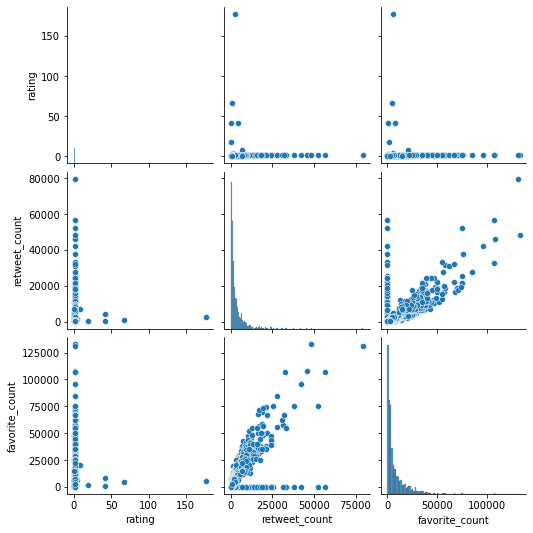

In [63]:
sns.pairplot(archive_master, vars=["rating", "retweet_count", "favorite_count"]);

#### Learn which category has the highest number of retweets

And it appears to be the `floofer`

In [64]:
archive_master['category']=pd.melt(archive_master,id_vars=['id'],value_vars=['floofer','pupper','doggo','puppo'],var_name=['category'])['category']

In [65]:
archive_master.groupby(["category"],as_index=False)["retweet_count"].sum()

,category,retweet_count
0,floofer,7449933.0


#### Learn which category is loved the most

And it appears to be the `floofer` again.

In [66]:
archive_master.groupby(["category"],as_index=False)["favorite_count"].sum()

,category,favorite_count
0,floofer,19022600.0


### Visualization

In [67]:
archive_master['created_at']=pd.to_datetime(archive_master['created_at'])
archive_master['tweet_day']=archive_master['created_at'].dt.strftime("%a")

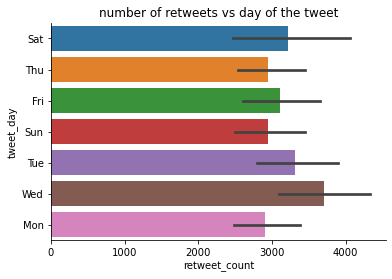

In [68]:
sorted_res=archive_master.sort_values('retweet_count')
graph=sns.barplot(y='tweet_day',x='retweet_count',data=sorted_res).set(title='number of retweets vs day of the tweet')
sns.despine()